<a href="https://colab.research.google.com/github/GabrielEmidio/DataScience/blob/main/EstudoGorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeiro projeto de Ciência de Dados com base na formação da **Alura:** Python para Data Science.

Base de dados disponibilizada para estudo no curso da Alura: Data Visualization: Explorando com Seaborn.

# **Importando a base de dados**

In [335]:
import pandas as pd

In [336]:
dados = pd.read_csv('/content/drive/MyDrive/tips_atualizado.csv')

In [337]:
dados.sample(5)

,total_bill,tip,dessert,day,time,size
3166,34.673622,3.537193,No,Sat,Dinner,3
1892,36.954686,2.090990,Yes,Sun,Dinner,2
1594,20.407409,1.370693,No,Thur,Lunch,2
60,20.290000,3.210000,Yes,Sat,Dinner,2
1281,13.461108,1.839327,Yes,Sat,Dinner,2


# **Tradução**

**Fazendo a tradução do DataFrame do Inglês para o Português.**

In [338]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [339]:
# Fazendo a tradução dos dados
renomear = {
    'total_bill': 'total_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'num_pessoas'
}

In [340]:
renomear

{'day': 'dia_da_semana',
 'dessert': 'sobremesa',
 'size': 'num_pessoas',
 'time': 'hora_do_dia',
 'tip': 'gorjeta',
 'total_bill': 'total_da_conta'}

In [341]:
gorjetas = dados.rename(columns = renomear)

In [342]:
gorjetas.head()

,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [343]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [344]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}
gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [345]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [346]:
gorjetas.sample(3)

,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas
1553,20.255294,2.639944,Não,Thur,Lunch,2
2297,15.609419,3.222221,Sim,Fri,Dinner,2
246,23.096605,2.890123,Não,Sun,Dinner,3


In [347]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [348]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [349]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [350]:
gorjetas.sample(3)

,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas
3062,16.575382,2.949627,Não,Quinta,Lunch,2
3181,13.515558,3.046764,Não,Domingo,Dinner,2
2864,32.337531,2.786882,Sim,Domingo,Dinner,4


In [351]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [352]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [353]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [354]:
gorjetas.sample(3)

,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas
3213,15.908097,2.667789,Não,Domingo,Jantar,2
48,28.550000,2.050000,Não,Domingo,Jantar,3
1139,12.585697,2.126223,Não,Domingo,Jantar,2


# **Importando o Seaborn**

In [355]:
!pip install seaborn

In [356]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [357]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: matplotlib, pandas, numpy, scipy
Required-by: missingno


# **Análisando os dados**

**Análise descritiva.**

In [358]:
gorjetas.describe()

,total_da_conta,gorjeta,num_pessoas
count,3416.000000,3416.000000,3416.000000
mean,19.824368,2.711189,2.569672
std,8.984716,1.078789,0.949288
min,2.799644,0.766203,1.000000
25%,13.388590,1.919737,2.000000
50%,17.800015,2.549192,2.000000
75%,24.331401,3.292833,3.000000
max,55.804318,10.000000,6.000000


In [359]:
print(f'A base de dados é composta por {gorjetas.shape[0]} linhas e {gorjetas.shape[1]} colunas.\n')
print('Registros NaN:')
gorjetas.count()

A base de dados é composta por 3416 linhas e 6 colunas.

Registros NaN:


total_da_conta    3416
gorjeta           3416
sobremesa         3416
dia_da_semana     3416
hora_do_dia       3416
num_pessoas       3416
dtype: int64

## **Valor da conta e gorjeta**

In [360]:
gorjetas.head()

,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


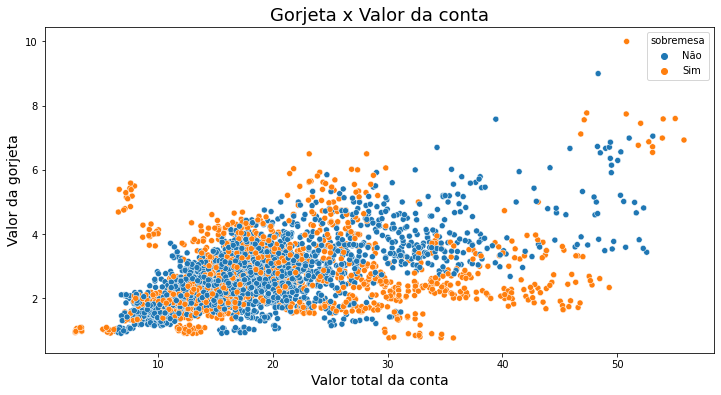

In [361]:
valor_gorjeta = sns.scatterplot(x = 'total_da_conta', y = 'gorjeta',hue = 'sobremesa', data = gorjetas)
valor_gorjeta.figure.set_size_inches(12, 6)
valor_gorjeta.set_title('Gorjeta x Valor da conta', fontsize = 18)
valor_gorjeta.set_xlabel('Valor total da conta', fontsize = 14)
valor_gorjeta.set_ylabel('Valor da gorjeta', fontsize = 14)
valor_gorjeta = valor_gorjeta

Text(0, 0.5, 'Valor da gorjeta')

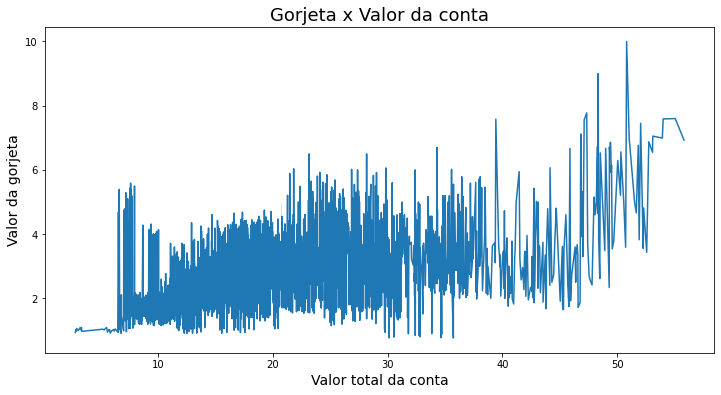

In [362]:
valor_gorjeta_linha = sns.lineplot(x = 'total_da_conta', y = 'gorjeta', data = gorjetas)
valor_gorjeta_linha.figure.set_size_inches(12, 6)
valor_gorjeta_linha.set_title('Gorjeta x Valor da conta', fontsize = 18)
valor_gorjeta_linha.set_xlabel('Valor total da conta', fontsize = 14)
valor_gorjeta_linha.set_ylabel('Valor da gorjeta', fontsize = 14)

**Conforme o valor da conta aumenta, podemos perceber que a gorjeta também aumenta.**

Gráfico no qual mostra o valor da gorjeta para contas sem e com sobremesa.




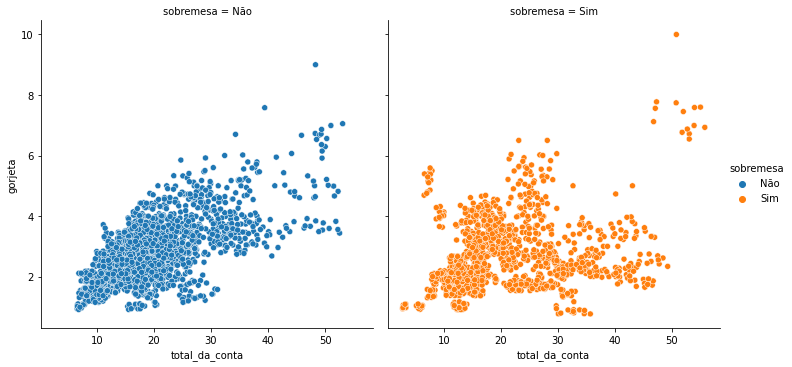

In [363]:
sns.relplot(x = 'total_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)
print('Gráfico no qual mostra o valor da gorjeta para contas sem e com sobremesa.\n\n')

**Criando porcentagem.**

In [364]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['total_da_conta']

In [365]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [366]:
print('\nColuna chamada porcentagem criada através da porcentagem da gorjeta para cada conta.\n')
gorjetas.head()


Coluna chamada porcentagem criada através da porcentagem da gorjeta para cada conta.



,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [367]:
def conta_porcentagem(titulo, labelx, labely, x, y, dataset):
  ax = sns.scatterplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

In [368]:
def conta_porcentagem2(titulo, labelx, labely, x, y, dataset):
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

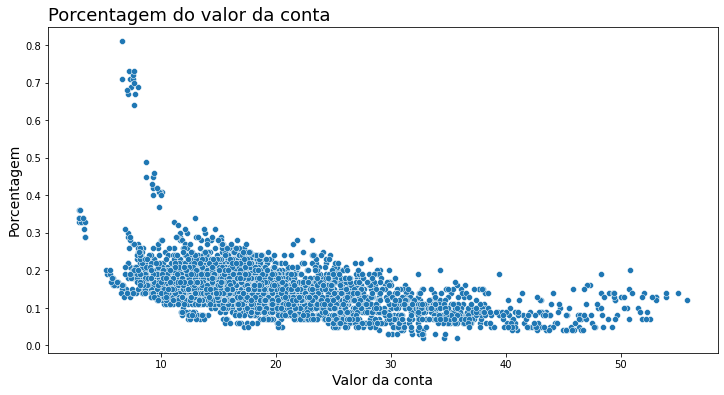

In [369]:
conta_porcentagem('Porcentagem do valor da conta', 'Valor da conta', 'Porcentagem', 'total_da_conta', 'porcentagem', gorjetas)

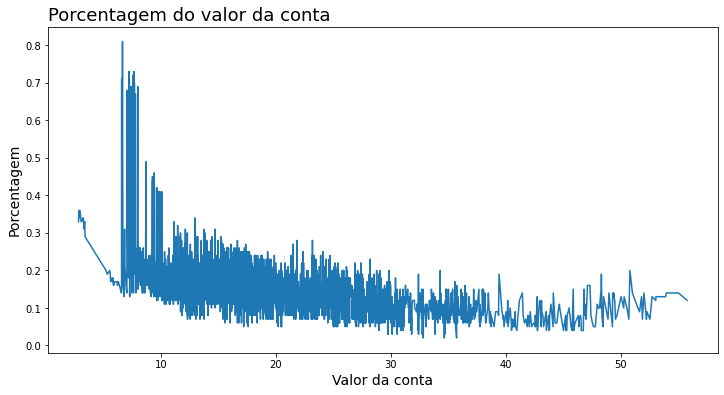

In [370]:
conta_porcentagem2('Porcentagem do valor da conta', 'Valor da conta', 'Porcentagem', 'total_da_conta', 'porcentagem', gorjetas)

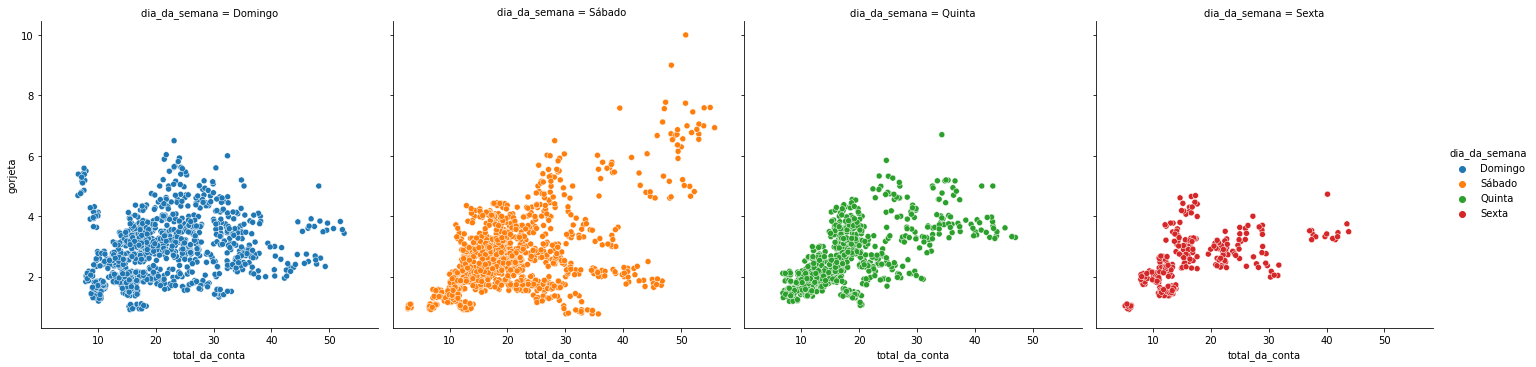

In [298]:
sns.relplot(x = 'total_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

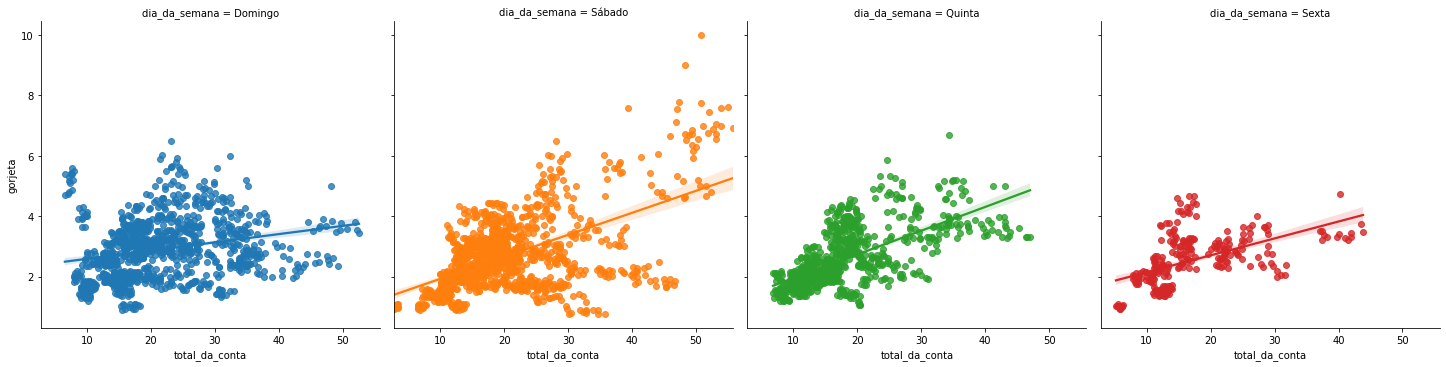

In [299]:
sns.lmplot(x = 'total_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

##**Dia da semana**

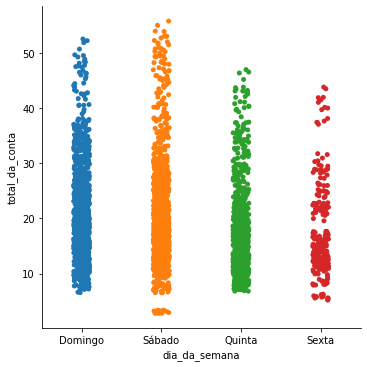

In [300]:
sns.catplot(x = 'dia_da_semana', y = 'total_da_conta', data = gorjetas)

In [301]:
conta_total = gorjetas['dia_da_semana'].value_counts()
print('Números de contas para cada dia da semana:\n')
conta_total

Números de contas para cada dia da semana:



Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

**O Sábado dentre os dias da semana é o que tem maior número de contas, seguido por Domingo, Quinta e por último Sexta.**

##**Sobremesa**

In [302]:
gorjetas.head(3)

,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


**Análise descritiva das contas que tiveram sobremesa.**

In [303]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,total_da_conta,gorjeta,num_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


**Análise descritiva das contas que não tiveram sobremesa.**

In [304]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,total_da_conta,gorjeta,num_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


In [305]:
sobremesa_total = gorjetas['sobremesa'].value_counts()
print('Quantidade de contas sem/com sobremesa:')
sobremesa_total

Quantidade de contas sem/com sobremesa:


Não    2114
Sim    1302
Name: sobremesa, dtype: int64

In [306]:
sobremesa_sim = gorjetas.query("sobremesa == 'Sim'").total_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


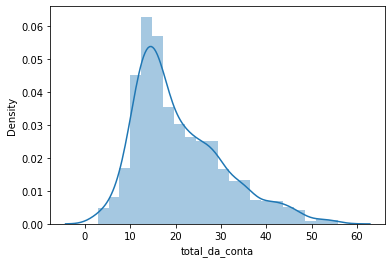

In [307]:
sns.distplot(sobremesa_sim)

In [308]:
sobremesa_nao = gorjetas.query("sobremesa == 'Não'").total_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


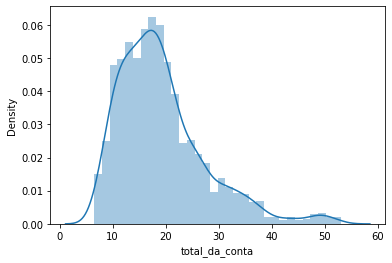

In [309]:
sns.distplot(sobremesa_nao)

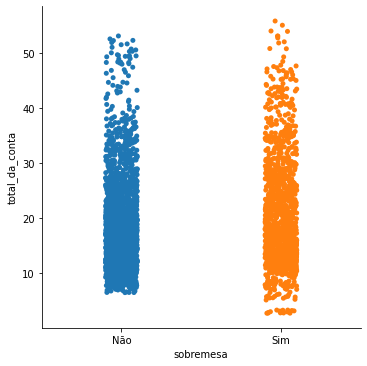

In [310]:
sns.catplot(x = 'sobremesa', y = 'total_da_conta', data = gorjetas)

##**Hora do dia**

In [311]:
gorjetas.head(3)

,total_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,num_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


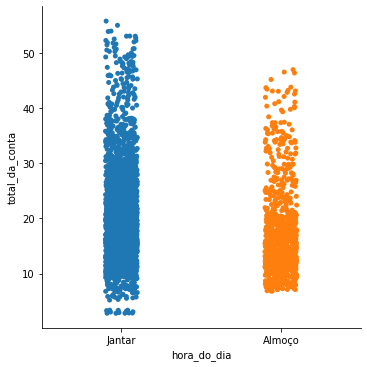

In [312]:
sns.catplot(x = 'hora_do_dia', y = 'total_da_conta', data = gorjetas)

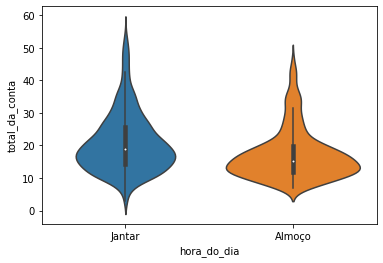

In [313]:
sns.violinplot(x = 'hora_do_dia', y = 'total_da_conta', data = gorjetas)

In [314]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").total_da_conta

In [315]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").total_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


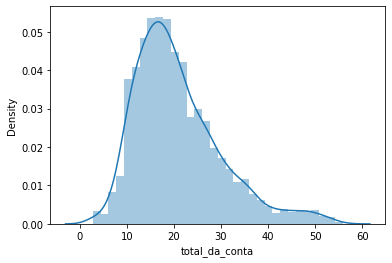

In [316]:
sns.distplot(jantar)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


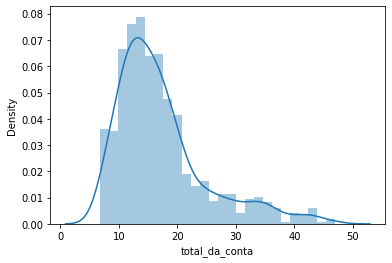

In [317]:
sns.distplot(almoco)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


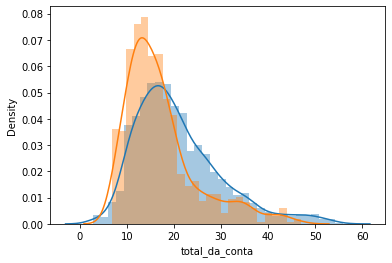

In [318]:
sns.distplot(jantar)
sns.distplot(almoco)

In [319]:
hora = gorjetas['hora_do_dia'].value_counts()
print('Quantidade total de contas para cada hora do dia:')
hora

Quantidade total de contas para cada hora do dia:


Jantar    2464
Almoço     952
Name: hora_do_dia, dtype: int64

#**Teste de hipótese**

In [320]:
from scipy.stats import ranksums

##**Sobremesa**

**H<sup>null</sup>**

**A taxa da gorjeta é a mesma nos dois grupos.**

**H<sup>alt</sup>**

**A taxa da gorjeta não é a mesma nos dois grupos.**

In [321]:
com_sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [322]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [323]:
resultado = ranksums(com_sobremesa, sem_sobremesa)

In [324]:
print(f'O valor do p-value é {resultado.pvalue}.')

O valor do p-value é 0.033144013617673405.


**H<sup>alt</sup>**

**A taxa da gorjeta não é a mesma nos dois grupos.**

##**Valor da conta**

**Teste das 2 maiores receitas.**


**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo.**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo.**

In [325]:
total_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").total_da_conta

In [326]:
total_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").total_da_conta

In [327]:
resultado2 = ranksums(total_conta_sabado, total_conta_domingo)
resultado2

RanksumsResult(statistic=-3.512690684754087, pvalue=0.0004435935681441821)

In [328]:
print(f'O valor do p-value é {resultado2.pvalue}.')

O valor do p-value é 0.0004435935681441821.


**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo.**

##**Hora do dia**

**H<sup>null</sup>**

**A distribuição do valor da conta é igual no almoço e no jantar.**

**H<sup>alt</sup>**

**A distribuição do valor da conta não é igual no sábado e no domingo.**

In [329]:
resultado3 = ranksums(almoco, jantar)
resultado3

RanksumsResult(statistic=-12.158511455786174, pvalue=5.169201062207143e-34)

In [330]:
print(f'O valor do p-value é {resultado3.pvalue}.')

O valor do p-value é 5.169201062207143e-34.


**H<sup>null</sup>**

**A distribuição do valor da conta é igual no almoço e no jantar.**

##**Gorjeta da hora do dia**

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no almoço e no jantar.**

**H<sup>alt</sup>**

>  **A distribuição da taxa da gorjeta não é igual no almoço e no jantar.**

In [331]:
almoco_porcentagem = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [332]:
jantar_porcentagem = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [333]:
resultado4 = ranksums(almoco_porcentagem, jantar_porcentagem)
resultado4

RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)

In [334]:
print(f'O valor do p-value é {resultado4.pvalue}.')

O valor do p-value é 1.3785725618355523e-11.


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no almoço e no jantar.**